In [1]:
# Chess Board Training

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import os
from ultralytics import YOLO


0: 544x800 1 0, 42.0ms
Speed: 3.1ms preprocess, 42.0ms inference, 60.0ms postprocess per image at shape (1, 3, 544, 800)


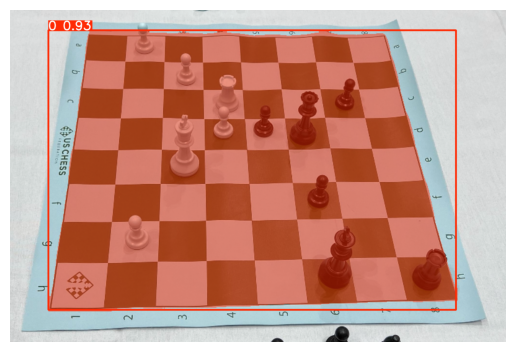

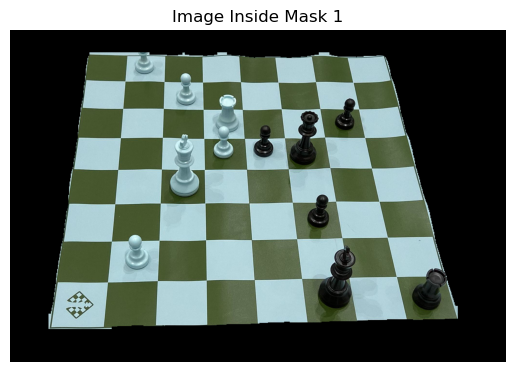

In [3]:
# Load the YOLO model
model_path = os.path.join('.', 'runs', 'segment', 'train', 'weights', 'best.pt')
model = YOLO(model_path)

# Load the image
image_path = "C:/Users/Daithoulung Rongmai/KRS(ML)/ProjectRe/Chess-Pieces-23/train/images/889c420fb266b8d0e817306110042bda_jpg.rf.02d22a79820be51228296021ad0b6bbb.jpg"
img = Image.open(image_path)

# Run inference
results = model.predict(img, conf=0.8)

# Display results
for result in results:
    img_np = result.plot() if hasattr(result, 'plot') else result  
    plt.imshow(img_np)
    plt.axis('off')
    plt.show()

    if hasattr(result, 'masks'):
        # Extract the mask data
        masks = result.masks.data.cpu().numpy()  # Get the masks and convert to NumPy array
        
        # Iterate over masks
        for i in range(masks.shape[0]):
            mask = masks[i]

            # Convert mask to binary (0, 255) for visualization
            mask_binary = (mask * 255).astype(np.uint8)

            # Resize mask to match the original image size
            mask_binary_resized = cv2.resize(mask_binary, (img_np.shape[1], img_np.shape[0]), interpolation=cv2.INTER_NEAREST)

            # Extract the image inside the mask
            img_np = np.array(img)  # Convert PIL image to NumPy array
            masked_image = cv2.bitwise_and(img_np, img_np, mask=mask_binary_resized)

            # Display the masked image
            plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
            plt.title(f'Image Inside Mask {i + 1}')
            plt.axis('off')
            plt.show()
    else:
        print("No masks found in the results.")



0: 800x800 1 0, 11.5ms
Speed: 4.0ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)


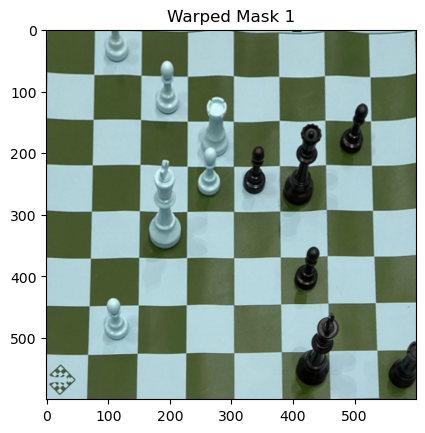

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from ultralytics import YOLO

# Load the YOLO model
model_path = os.path.join('.', 'runs', 'segment', 'train', 'weights', 'best.pt')
model = YOLO(model_path)

# Load the image
image_path = "C:/Users/Daithoulung Rongmai/KRS(ML)/ProjectRe/Chess-Pieces-23/train/images/889c420fb266b8d0e817306110042bda_jpg.rf.02d22a79820be51228296021ad0b6bbb.jpg"
img = Image.open(image_path)

img = img.resize((600, 600))

results = model.predict(img, conf=0.3)

# Display results
for result in results:
    img_np = result.plot() if hasattr(result, 'plot') else result  

    if hasattr(result, 'masks'):
        # Extract the mask data
        masks = result.masks.data.cpu().numpy()  # Get the masks and convert to NumPy array
        
        # Iterate over masks
        for i in range(masks.shape[0]):
            mask = masks[i]

            # Convert mask to binary (0, 255) for visualization
            mask_binary = (mask * 255).astype(np.uint8)

            # Resize mask to match the original image size
            mask_binary_resized = cv2.resize(mask_binary, (img_np.shape[1], img_np.shape[0]), interpolation=cv2.INTER_NEAREST)

            # Extract the image inside the mask
            img_np = np.array(img)  # Convert PIL image to NumPy array
            masked_image = cv2.bitwise_and(img_np, img_np, mask=mask_binary_resized)

            # Find contours of the mask
            contours, _ = cv2.findContours(mask_binary_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Get the largest contour, assuming it corresponds to the object of interest
            if contours:
                largest_contour = max(contours, key=cv2.contourArea)

                # Approximate the contour to get the corners
                epsilon = 0.02 * cv2.arcLength(largest_contour, True)
                approx_corners = cv2.approxPolyDP(largest_contour, epsilon, True)

                if len(approx_corners) == 4:  # We need 4 corners for perspective transformation
                    src_pts = np.array([pt[0] for pt in approx_corners], dtype="float32")

                    # Define destination points for the top-down view (e.g., 600x600)
                    dst_pts = np.array([[0, 0], [600, 0], [600, 600], [0, 600]], dtype="float32")

                    # Compute the perspective transform matrix
                    M = cv2.getPerspectiveTransform(src_pts, dst_pts)

                    # Apply the warp perspective transformation
                    warped_mask = cv2.warpPerspective(masked_image, M, (600, 600))
                    
                    rotated_mask= cv2.rotate(warped_mask, cv2.ROTATE_90_CLOCKWISE)

                    mirrored_mask = cv2.flip(rotated_mask, 1)

                    plt.imshow(cv2.cvtColor(mirrored_mask, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
                    plt.title(f'Warped Mask {i + 1}')
                    # plt.axis('off')
                    plt.show()
                else:
                    print("Could not find 4 corners for perspective transformation.")
            else:
                print("No contours found for the mask.")
    else:
        print("No masks found in the results.")



0: 800x800 1 black-king, 3 black-pawns, 1 black-rook, 1 white-king, 3 white-pawns, 1 white-rook, 21.0ms
Speed: 9.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)


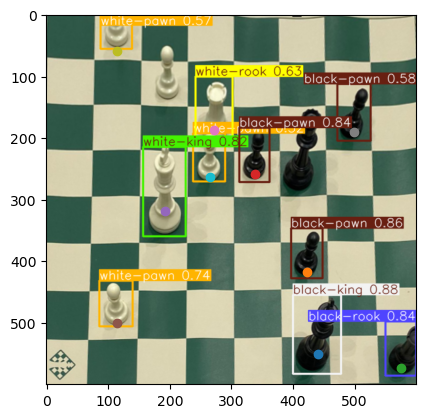


0: 800x800 1 black-king, 3 black-pawns, 1 black-queen, 1 black-rook, 1 white-king, 4 white-pawns, 1 white-rook, 12.0ms
Speed: 7.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)


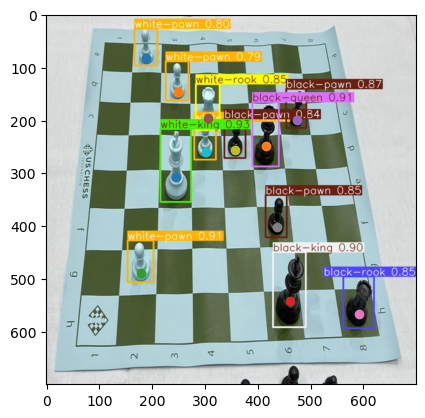

[[439.738037109375, 549.929931640625], [423.0435791015625, 417.90802001953125], [575.49609375, 572.8540649414062], [338.159912109375, 258.3171844482422], [192.14593505859375, 318.0559387207031], [113.64276885986328, 499.5498046875], [272.32232666015625, 185.9541473388672], [499.51263427734375, 189.92678833007812], [114.1190185546875, 58.41860389709473], [264.51861572265625, 262.6965637207031]]


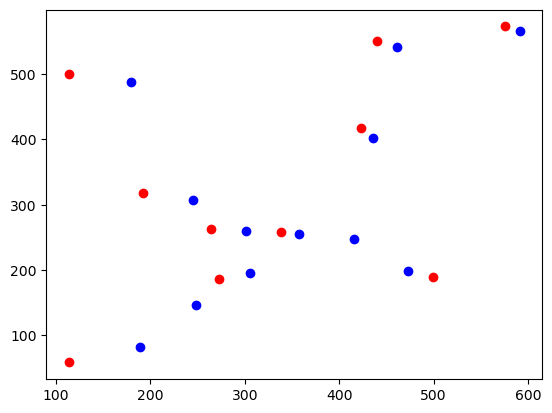

In [22]:
model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'last.pt')
model = YOLO(model_path)

results = model.predict(mirrored_mask, conf=0.3)
CA1 = []
CB1 = []
custom = 30
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    for box in boxes:
        CA2 = []
        x_min, y_min, x_max, y_max = box
        center_x = (x_min + x_max) / 2
        center_y = ((y_min + y_max) / 2) + custom
        plt.scatter(center_x, center_y)
        CA2.append(center_x)
        CA2.append(center_y)
        CA1.append(CA2)
        
img_np = result.plot()
plt.imshow(img_np)
# plt.axis('off')
plt.show()

model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'last.pt')
model = YOLO(model_path)

img_resized = img.resize((700, 700))

results = model.predict(img_resized, conf=0.3)

custom = 20
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    for box in boxes:
        CB2 = []
        x_min, y_min, x_max, y_max = box
        center_x = (x_min + x_max) / 2
        center_y = ((y_min + y_max) / 2) + custom
        plt.scatter(center_x, center_y)
        CB2.append(center_x)
        CB2.append(center_y)
        CB1.append(CB2)
img_np = result.plot()
plt.imshow(img_np)
# plt.axis('off')
plt.show()
print(CA1)
# print(CB1)

for i in range(len(CA1)):
    plt.scatter(CA1[i][0], CA1[i][1], c='red')

for i in range(len(CB1)):
    plt.scatter(CB1[i][0], CB1[i][1], c='blue')

# plt.scatter(427.269775390625, 543.0438232421875)

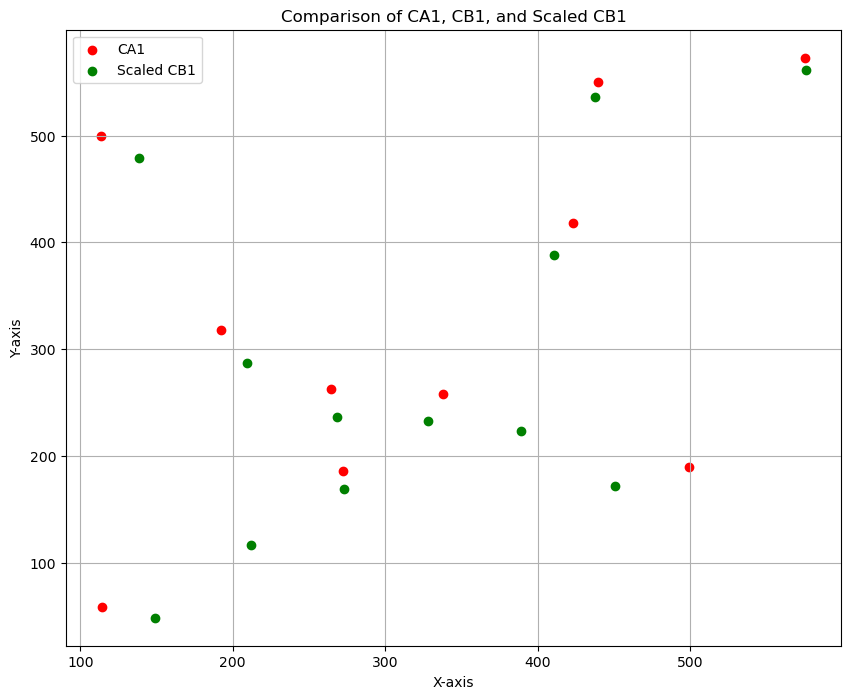

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Convert CA1 and CB1 lists to numpy arrays for easier calculations
CA1_coords = np.array(CA1)
CB1_coords = np.array(CB1)

# Step 1: Calculate the centroids
CA1_centroid = CA1_coords.mean(axis=0)
CB1_centroid = CB1_coords.mean(axis=0)

# Step 2: Calculate average distances from the centroid
CA1_distances = np.linalg.norm(CA1_coords - CA1_centroid, axis=1)
CB1_distances = np.linalg.norm(CB1_coords - CB1_centroid, axis=1)

# Calculate the average distances
CA1_avg_distance = CA1_distances.mean()
CB1_avg_distance = CB1_distances.mean()

# Step 3: Determine the scaling factor
scale = CA1_avg_distance / CB1_avg_distance

# Adjust the scale if necessary
scale *= 0.9  # You can experiment with this value

# Step 4: Scale CB1 coordinates to match CA1
scaled_CB1 = []
for point in CB1_coords:
    # Scale the point relative to the centroid
    scaled_point = CB1_centroid + (point - CB1_centroid) * scale
    scaled_CB1.append(scaled_point)

# Convert scaled_CB1 back to a numpy array
scaled_CB1 = np.array(scaled_CB1)

# Step 5: Adjust offsets if necessary (check the values)
offset_x = 30
offset_y = 20

# Plotting
plt.figure(figsize=(10, 8))
for i in range(len(CA1)):
    plt.scatter(CA1[i][0], CA1[i][1], c='red', label='CA1' if i == 0 else "")

# for i in range(len(CB1)):
#     plt.scatter(CB1[i][0], CB1[i][1], c='blue', label='CB1' if i == 0 else "")

for i in range(len(scaled_CB1)):
    plt.scatter(scaled_CB1[i][0] - offset_x, scaled_CB1[i][1] - offset_y, c='green', label='Scaled CB1' if i == 0 else "")

# Add legend
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparison of CA1, CB1, and Scaled CB1')
plt.grid()
plt.show()


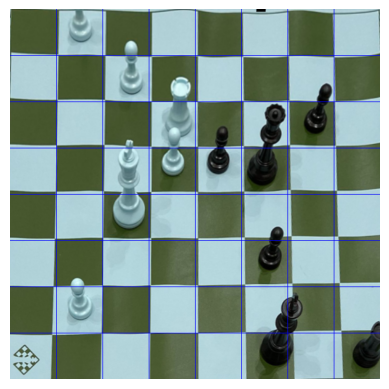

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'img_np' is the rotated warped image matrix (loaded or generated previously).

# Define the size of the grid
grid_size = 600  # We'll map the warped image to a 600x600 square

rows = 8
cols = 8

# Calculate the width and height of each cell in the grid
cell_width = grid_size // cols
cell_height = grid_size // rows

# Copy the warped image to draw the grid
img_with_grid = mirrored_mask.copy()

# Draw horizontal lines for the grid
for i in range(1, rows):
    y = i * cell_height
    cv2.line(img_with_grid, (0, y), (grid_size, y), (255, 0, 0), 1)  # Horizontal line

# Draw vertical lines for the grid
for i in range(1, cols):
    x = i * cell_width
    cv2.line(img_with_grid, (x, 0), (x, grid_size), (255, 0, 0), 1)  # Vertical line

# Display the warped image with the grid
plt.imshow(cv2.cvtColor(img_with_grid, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in Matplotlib
plt.axis('off')  # Remove axis for a clean display
plt.show()


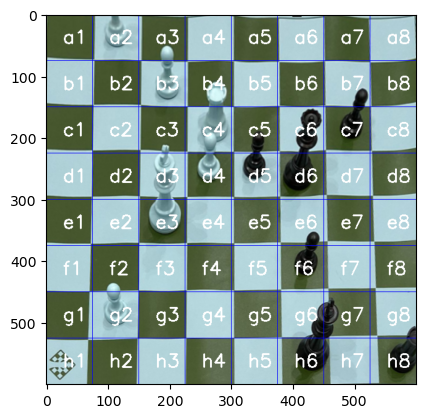

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assume previous code created warped_image and grid dimensions
rows, cols = 8, 8
grid_size = 600
cell_width = grid_size // cols
cell_height = grid_size // rows

# Chessboard column labels ('a' to 'h') and row labels ('1' to '8')
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
rows_labels = ['1', '2', '3', '4', '5', '6', '7', '8']

# Reverse the row labels to make sure bottom-left is 'a1'
# rows_labels.reverse()

# Copy the warped image to draw labels
img_with_labels = img_with_grid.copy()

# Iterate over each cell in the grid
for i in range(rows):
    for j in range(cols):
        # Calculate the top-left corner of the current cell
        x = j * cell_width
        y = i * cell_height

        # Generate the corresponding chessboard label
        label = columns[i] + rows_labels[j]

        # Place the label at the center of the cell
        text_x = x + cell_width // 2 - 10  # Adjust for text alignment
        text_y = y + cell_height // 2 + 10  # Adjust for text alignment

        # Add the label to the image (white text with font size 1)
        cv2.putText(img_with_labels, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Display the warped image with grid and labels
plt.imshow(cv2.cvtColor(img_with_labels, cv2.COLOR_BGR2RGB))
plt.show()


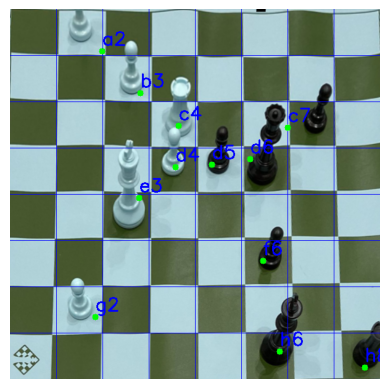

In [26]:
res = img_with_grid.copy()
boxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding box coordinates (x_min, y_min, x_max, y_max)

piece_positions = {}
itr = 0
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    classes = result.boxes.cls.cpu().numpy()  # Get the class indices
    names = result.names  # Get the class names

    for box, class_id in zip(boxes, classes):
        x_min, y_min, x_max, y_max = box
        center_x = scaled_CB1[itr][0]-offset_x
        center_y = scaled_CB1[itr][1]-offset_y+20
        # Calculate the grid position
        grid_col = int(center_x // cell_width)
        grid_row = int(center_y // cell_height)
        
        itr += 1
        
        if 0 <= grid_col < cols and 0 <= grid_row < rows:
            # Get the corresponding grid label
            grid_label = columns[grid_row] + rows_labels[grid_col]

            # Store the piece position and type in the dictionary
            piece_positions[grid_label] = names[int(class_id)]  # Correctly map label to class name
            
            cv2.circle(res, (int(center_x), int(center_y)), 5, (0, 255, 0), -1)
            cv2.putText(res, grid_label, (int(center_x), int(center_y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        else:
            print(f"Center point ({center_x}, {center_y}) is outside the grid bounds.")

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


A white-pawn is located in a2.
A white-pawn is located in b3.
A white-rook is located in c4.
A black-pawn is located in c7.
A white-pawn is located in d4.
A black-pawn is located in d5.
A black-queen is located in d6.
A white-king is located in e3.
A black-pawn is located in f6.
A white-pawn is located in g2.
A black-king is located in h6.
A black-rook is located in h8.


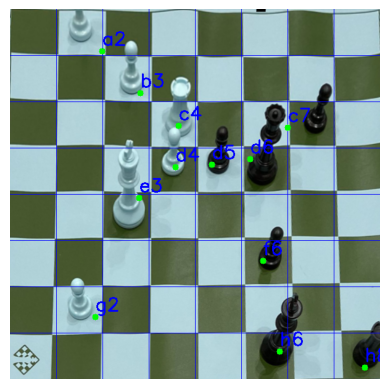

In [10]:
def check_piece_in_cell(cell_label):
    if cell_label in piece_positions:
        return f"A {piece_positions[cell_label]} is located in {cell_label}."
    else:
        return

for i in range(rows):
    for j in range(cols):
        # Calculate the top-left corner of the current cell
        x = j * cell_width
        y = i * cell_height

        # Generate the corresponding chessboard label
        label = columns[i] + rows_labels[j]
        if check_piece_in_cell(label) != None:
            print(check_piece_in_cell(label))
        

# Display the final image with the grid and labels
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
import chess

piece_map = {
    'white-rook': chess.Piece(chess.ROOK, chess.WHITE),
    'white-knight': chess.Piece(chess.KNIGHT, chess.WHITE),
    'white-bishop': chess.Piece(chess.BISHOP, chess.WHITE),
    'white-queen': chess.Piece(chess.QUEEN, chess.WHITE),
    'white-king': chess.Piece(chess.KING, chess.WHITE),
    'white-pawn': chess.Piece(chess.PAWN, chess.WHITE),
    'black-rook': chess.Piece(chess.ROOK, chess.BLACK),
    'black-knight': chess.Piece(chess.KNIGHT, chess.BLACK),
    'black-bishop': chess.Piece(chess.BISHOP, chess.BLACK),
    'black-queen': chess.Piece(chess.QUEEN, chess.BLACK),
    'black-king': chess.Piece(chess.KING, chess.BLACK),
    'black-pawn': chess.Piece(chess.PAWN, chess.BLACK),
}

# Create an empty chess board
board = chess.Board(None)  # None initializes an empty board

# Function to place pieces on the board
def set_up_board(board, piece_positions):
    for position, piece_description in piece_positions.items():
        piece = piece_map[piece_description]  # Get the chess library's piece object
        square = chess.parse_square(position)  # Convert 'a1' to the chess library's square index
        board.set_piece_at(square, piece)

# Set up the board using the piece_positions dictionary
set_up_board(board, piece_positions)

board.turn = chess.BLACK
# Generate the FEN string
fen_string = board.fen()



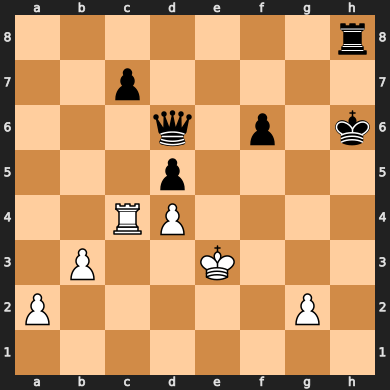

In [12]:
board = chess.Board(fen_string)
board

In [13]:
from stockfish import Stockfish

stockfish=Stockfish("StockFish/stockfish-windows-x86-64-avx2.exe")
stockfish.set_depth(20)#How deep the AI looks
stockfish.set_skill_level(20)#Highest rank stockfish
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

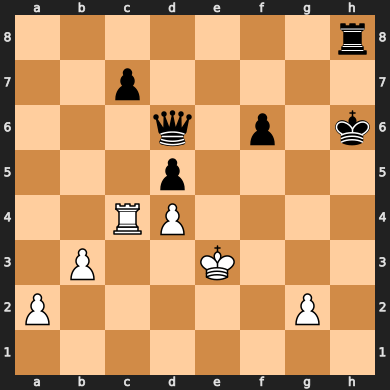

{'type': 'mate', 'value': -11}

In [14]:
display(board)
stockfish.set_fen_position(board.fen())
stockfish.get_evaluation()

In [15]:
board.turn = chess.BLACK
stockfish.set_fen_position(board.fen())
stockfish.get_evaluation()

{'type': 'mate', 'value': -11}

In [16]:
print(board.fen())
stockfish.get_evaluation()

7r/2p5/3q1p1k/3p4/2RP4/1P2K3/P5P1/8 b - - 0 1


{'type': 'mate', 'value': -11}

In [17]:
board.turn = chess.WHITE
stockfish.set_fen_position(board.fen())
print(board.fen())
stockfish.get_evaluation()

7r/2p5/3q1p1k/3p4/2RP4/1P2K3/P5P1/8 w - - 0 1


{'type': 'cp', 'value': -850}

In [18]:
top_moves = stockfish.get_top_moves(3)
top_moves

[{'Move': 'c4c1', 'Centipawn': -943, 'Mate': None},
 {'Move': 'g2g4', 'Centipawn': None, 'Mate': -16},
 {'Move': 'c4c2', 'Centipawn': None, 'Mate': -15}]

In [19]:
for move in top_moves:
    print(move['Move'][2:])

c1
g4
c2


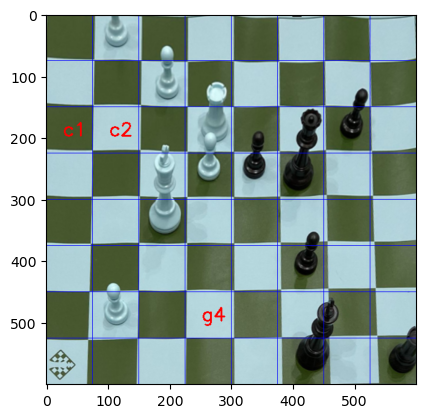

In [20]:
img_with_labels = img_with_grid.copy()
for i in range(rows):
    for j in range(cols):
        # Calculate the top-left corner of the current cell
        x = j * cell_width
        y = i * cell_height

        # Generate the corresponding chessboard label
        label = columns[i] + rows_labels[j]

        # Place the label at the center of the cell
        text_x = x + cell_width // 2 - 10  # Adjust for text alignment
        text_y = y + cell_height // 2 + 10  # Adjust for text alignment

        for move in top_moves:
            if label == (move['Move'][2:]):
                cv2.putText(img_with_labels, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)


plt.imshow(cv2.cvtColor(img_with_labels, cv2.COLOR_BGR2RGB))